In [1]:
import pandas as pd
import numpy as np


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# configuración de estilo de los gráficos
sns.set(style="whitegrid")




In [5]:
# cargar dataset de Mall Customers 
data = pd.read_csv('Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
from pathlib import Path
data_path = Path("Mall_Customers.csv")
if data_path.exists():
    df = pd.read_csv(data_path)
    display(df.head())
    print(f"Archivo cargado desde: {data_path}")
else:
    print("⚠️ No se encontró el archivo en:")
    print(data_path)
    print("Verifica la ruta o el nombre del archivo.")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Archivo cargado desde: Mall_Customers.csv


In [8]:
print (df.columns.tolist())


['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [9]:
# procesamiento: eliminar columnas innecesarias
df = df.drop(columns=['CustomerID'])
print(df.columns.tolist())


['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


/var/folders/7r/x7xbj7g90xx_pgccp8jxvb8m0000gn/T/ipykernel_17737/59124408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='Set2')


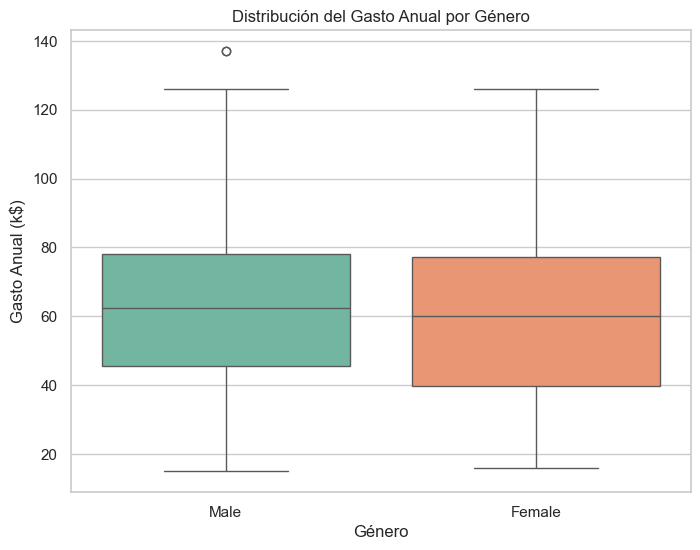

In [11]:
# caja de bigotes del gasto anual por género
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='Set2')
plt.title('Distribución del Gasto Anual por Género')
plt.xlabel('Género')
plt.ylabel('Gasto Anual (k$)')
plt.show()


/var/folders/7r/x7xbj7g90xx_pgccp8jxvb8m0000gn/T/ipykernel_17737/535772997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set3')


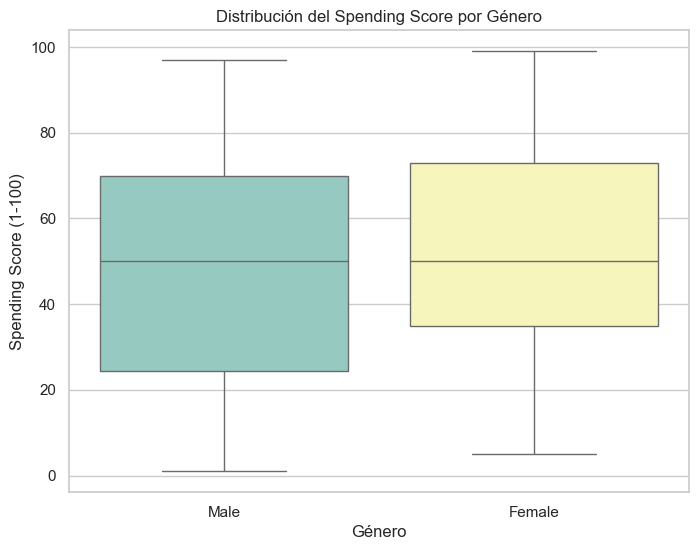

In [18]:
# caja de bigotes del spend score por género
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set3')
plt.title('Distribución del Spending Score por Género')
plt.xlabel('Género')
plt.ylabel('Spending Score (1-100)')
plt.show()


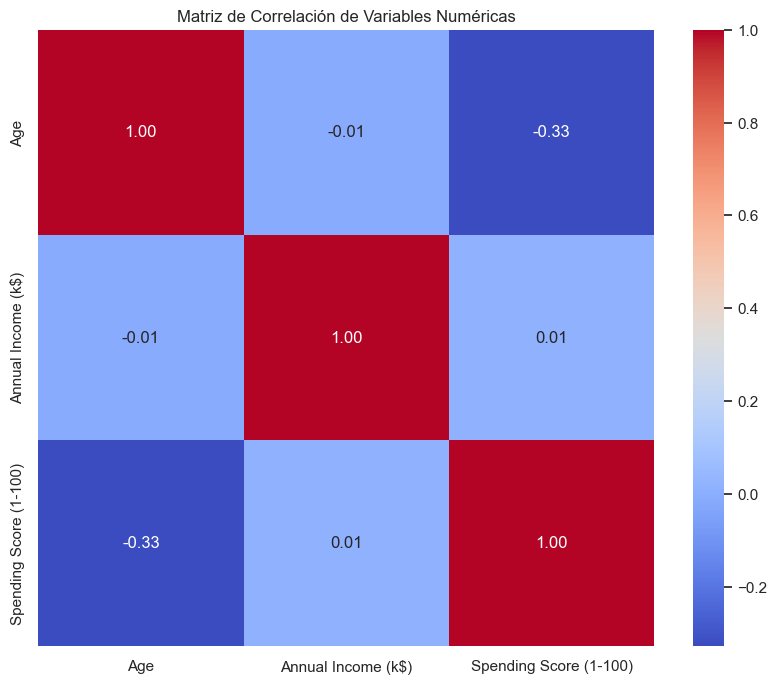

In [32]:
# matriz de correlación de todas las variables numéricas expecto genéro
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


In [33]:
#correlacion entre genero y gasto anual
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender_Num'] = df['Gender'].map(gender_mapping)
correlation = df['Gender_Num'].corr(df['Annual Income (k$)'])   
print(f"Correlación entre Género y Gasto Anual: {correlation:.2f}") 


Correlación entre Género y Gasto Anual: -0.06


In [34]:
#correlacion entre genero y spend score
correlation = df['Gender_Num'].corr(df['Spending Score (1-100)'])   
print(f"Correlación entre Género y Spending Score: {correlation:.2f}")          
    

Correlación entre Género y Spending Score: 0.06


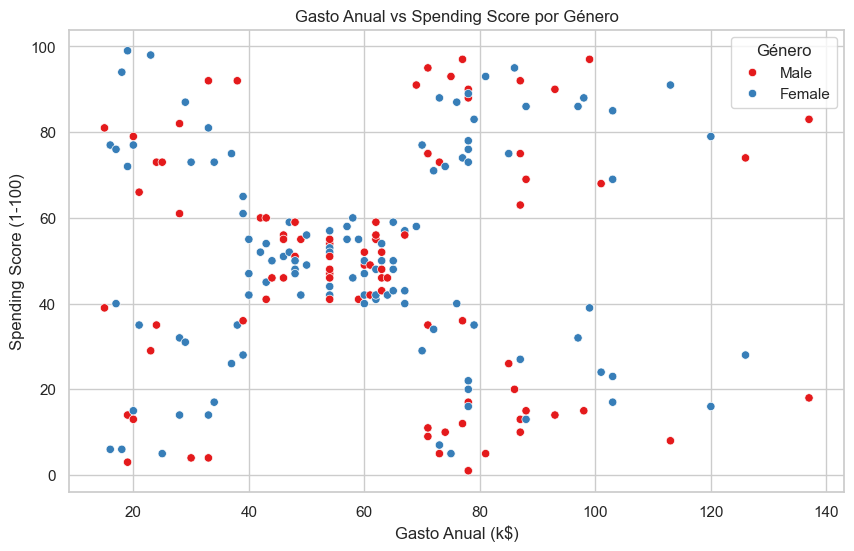

In [35]:
# scatter plot del gasto anual vs spend score por género
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set1')
plt.title('Gasto Anual vs Spending Score por Género')
plt.xlabel('Gasto Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Género')
plt.show()  

In [36]:
# correlación entre anual income y age 
correlation = df['Annual Income (k$)'].corr(df['Age'])
print(f"Correlación entre Gasto Anual y Edad: {correlation:.2f}")   


Correlación entre Gasto Anual y Edad: -0.01


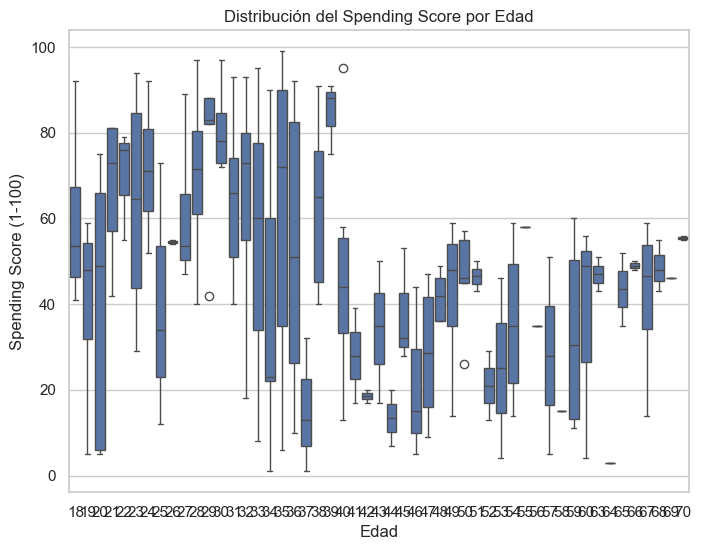

In [38]:
# crea caja de bigotes de spending score por edad
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Distribución del Spending Score por Edad')
plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.show()

